In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 1.2499
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 1.2498
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 1.2497
Epoch 4/50
1/1 [==============================] - 0s 29ms/step - loss: 1.2494
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 1.2492
Epoch 6/50
1/1 [==============================] - 0s 22ms/step - loss: 1.2489
Epoch 7/50
1/1 [==============================] - 0s 27ms/step - loss: 1.2485
Epoch 8/50
1/1 [==============================] - 0s 26ms/step - loss: 1.2481
Epoch 9/50
1/1 [==============================] - 0s 23ms/step - loss: 1.2477
Epoch 10/50
1/1 [==============================] - 0s 21ms/step - loss: 1.2472
Epoch 11/50
1/1 [==============================] - 0s 21ms/step - loss: 1.2467
Epoch 12/50
1/1 [==============================] - 0s 21ms/step - loss: 1.2461
Epoch 13/50
1/1 [==============================] - 0s 22ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

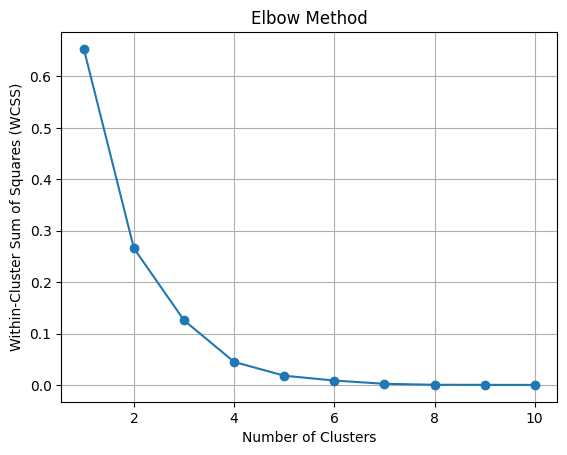

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Comparing characteristics of Cluster 0 with predicates:

Lakshadweep:
GHI(W/m2): 828.0   expected: high   falls within expected category: True
Population: 69000.0   expected: moderate to high   falls within expected category: False
Energy consumption (kWh): 56511000.0   expected: moderate to high   falls within expected category: False
Solar potential ( MW ): 4.97   expected: high   falls within expected category: False
Wind speed (m/s): 3.73   expected: low   falls within expected category: True

Manipur:
GHI(W/m2): 851.0   expected: high   falls within expected category: True
Population: 3223000.0   expected: moderate to high   falls within expected category: False
Energy consumption (kWh): 1166726000.0   expected: moderate to high   falls within expected category: False
Solar potential ( MW ): 10360.0   expected: high   falls within expected category: False
Wind speed (m/s): 2.9   expected: low   falls within expected category: True

Meghalaya:
GHI(W/m2): 869.0   expected: high   f

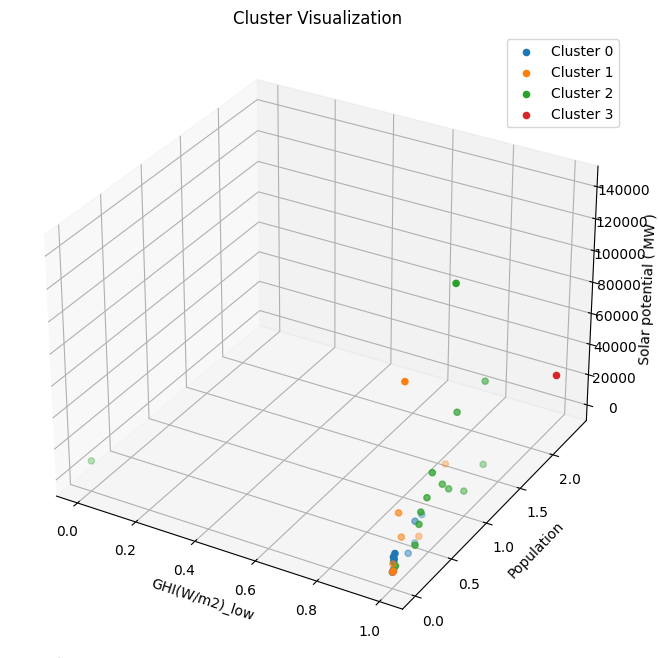

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math


data = pd.read_csv("/content/drive/MyDrive/minipro/Miniproject_data.csv")

data.dropna(subset=['States'], inplace=True)

# Define range-based predicates for each parameter
predicates = {
    'GHI(W/m2)': {'low': (None, 642.2), 'moderate': (642.2, 824.6), 'high': (824.6, np.inf)},
    'Population': {'low': (None, 78608333.33), 'moderate': (78608333.33, 157147666.66), 'high': (157147666.66, np.inf)},
    'Energy consumption (kWh)': {'low': (None, 6.68213E10), 'moderate': (6.68213E10, 1.33643E11), 'high': (1.33643E11, np.inf)},
    'Solar potential ( MW )': {'low': (None, 47439.98), 'moderate': (47439.98, 94874.99), 'high': (94874.99, np.inf)},
    'Wind speed (m/s)': {'low': (None, 3.76), 'moderate': (3.76, 5.38), 'high': (5.38, np.inf)}
}

# Select parameters for clustering
clustering_params = ['GHI(W/m2)', 'Population', 'Energy consumption (kWh)', 'Solar potential ( MW )', 'Wind speed (m/s)']

# Convert predicates to numerical values
for param in clustering_params:
    data[param] = pd.to_numeric(data[param], errors='coerce')
    for cat, (low, high) in predicates[param].items():
        if low is not None and high is not None:
            data[param + '_' + cat] = np.where((data[param] >= low) & (data[param] < high), 1, 0)
        elif low is not None:
            data[param + '_' + cat] = np.where(data[param] >= low, 1, 0)
        elif high is not None:
            data[param + '_' + cat] = np.where(data[param] >= high, 1, 0)

# Select relevant parameters for clustering
X = data[[param + '_' + cat for param in clustering_params for cat in ['low', 'moderate', 'high']]]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the dimensions of the latent space
latent_dim = 2

# Define the autoencoder model
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(500, activation='relu')(input_layer)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Compile the autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='mse')

# Train the autoencoder model
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256)

# Extract the encoder model
encoder = Model(input_layer, encoded)

# Generate latent space representations
latent_representation = encoder.predict(X_scaled)

# Impute missing values in latent_representation
imputer = SimpleImputer(strategy='mean')
latent_representation_imputed = imputer.fit_transform(latent_representation)

# Apply elbow method to determine the optimal number of clusters
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(latent_representation_imputed)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Based on the elbow method, select the optimal number of clusters
optimal_clusters = 4  # Adjust based on the elbow point in the plot

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(latent_representation_imputed)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Define the category ranges for each parameter
category_ranges = {
    'GHI(W/m2)': {
        'low': (-math.inf, 642.2),
        'moderate': (642.2, 824.6),
        'high': (824.6, math.inf)
    },
    'Population': {
        'low': (-math.inf, 78608333.33),
        'moderate to high': (78608333.33, math.inf)
    },
    'Energy consumption (kWh)': {
        'low': (-math.inf, 6.68213E+10),
        'moderate to high': (6.68213E+10, math.inf)
    },
    'Solar potential ( MW )': {
        'low': (-math.inf, 47439.98),
        'moderate': (47439.98, 94874.99),
        'high': (94874.99, math.inf)
    },
    'Wind speed (m/s)': {
        'low': (-math.inf, 3.76),
        'moderate': (3.76, 5.38),
        'high': (5.38, math.inf)
    }
}

# Define expected categories for each parameter
expected_categories = {
    'GHI(W/m2)': 'high',
    'Population': 'moderate to high',
    'Energy consumption (kWh)': 'moderate to high',
    'Solar potential ( MW )': 'high',
    'Wind speed (m/s)': 'low'
}

# Modify the comparison loop to use the provided category ranges and expected categories
for cluster_num in range(optimal_clusters):
    print(f'\nComparing characteristics of Cluster {cluster_num} with predicates:')
    cluster_data = data[data['Cluster'] == cluster_num]
    for index, row in cluster_data.iterrows():
        state = row['States']
        print(f"\n{state}:")

        # Compare each parameter to the provided category ranges
        for parameter, ranges in category_ranges.items():
            value = row[parameter]
            category = None
            for cat, (low, high) in ranges.items():
                if low == -math.inf:
                    if value < high:
                        category = cat
                        break
                elif high == math.inf:
                    if value >= low:
                        category = cat
                        break
                else:
                    if low <= value < high:
                        category = cat
                        break

            # Get the expected category
            expected = expected_categories.get(parameter)

            # Check if the category falls within the expected category
            falls_within_expected = category == expected

            # Print the parameter value and whether it falls within the expected category
            print(f"{parameter}: {value}   expected: {expected}   falls within expected category: {falls_within_expected}")


# Visualize clusters on a plot to identify spatial patterns
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    ax.scatter(cluster_data['GHI(W/m2)_low'], cluster_data['Population'], cluster_data['Solar potential ( MW )'], label=f'Cluster {cluster_num}')

ax.set_xlabel('GHI(W/m2)_low')
ax.set_ylabel('Population')
ax.set_zlabel('Solar potential ( MW )')
ax.set_title('Cluster Visualization')
plt.legend()
plt.show()


In [ ]:
# Create a dictionary to store the count of true values for each state
state_predicates_count = {}

# Loop through each cluster
for cluster_num in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]

    # Loop through each state in the cluster
    for index, row in cluster_data.iterrows():
        state = row['States']
        predicates_count = 0

        # Loop through each parameter and check if it falls within the expected category
        for parameter, ranges in category_ranges.items():
            value = row[parameter]
            expected = expected_categories.get(parameter)

            # Compare the category to the expected category
            category = None
            for cat, (low, high) in ranges.items():
                if low == -math.inf:
                    if value < high:
                        category = cat
                        break
                elif high == math.inf:
                    if value >= low:
                        category = cat
                        break
                else:
                    if low <= value < high:
                        category = cat
                        break

            if category == expected:
                predicates_count += 1

        # Update the count for the state
        state_predicates_count[state] = predicates_count

# Sort the states based on the count of true values
sorted_states = sorted(state_predicates_count.items(), key=lambda x: x[1], reverse=True)

# Print the ranked states
print("Ranked States based on the number of satisfied predicates:")
for rank, (state, count) in enumerate(sorted_states, start=1):
    print(f"{rank}. {state}: {count} predicates satisfied")


Ranked States based on the number of satisfied predicates:
1. Rajasthan: 5 predicates satisfied
2. Uttar Pradesh: 4 predicates satisfied
3. Madhya Pradesh: 4 predicates satisfied
4. Maharashtra: 4 predicates satisfied
5. Bihar: 3 predicates satisfied
6. Odisha: 3 predicates satisfied
7. Punjab: 3 predicates satisfied
8. West Bengal	: 3 predicates satisfied
9. Andhra Pradesh: 2 predicates satisfied
10. Karnataka: 2 predicates satisfied
11. Tamil Nadu: 2 predicates satisfied
12. Gujarat: 2 predicates satisfied
13. Jammu and Kashmir: 2 predicates satisfied
14. Lakshadweep: 2 predicates satisfied
15. Manipur: 2 predicates satisfied
16. Meghalaya: 2 predicates satisfied
17. Mizoram: 2 predicates satisfied
18. Nagaland: 2 predicates satisfied
19. Jharkhand: 2 predicates satisfied
20. Chhattisgarh: 2 predicates satisfied
21. Goa: 2 predicates satisfied
22. Haryana: 2 predicates satisfied
23. Chandigarh: 2 predicates satisfied
24. Delhi: 2 predicates satisfied
25. Telangana: 2 predicates satis

In [ ]:
# Create a dictionary to store the count of true values for each state
state_predicates_count = {}

# Create a dictionary to store the predicates satisfied by each state
state_predicates = {}

# Loop through each cluster
for cluster_num in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]

    # Loop through each state in the cluster
    for index, row in cluster_data.iterrows():
        state = row['States']
        predicates_count = 0
        satisfied_predicates = []  # List to store the names of satisfied predicates

        # Loop through each parameter and check if it falls within the expected category
        for parameter, ranges in category_ranges.items():
            value = row[parameter]
            expected = expected_categories.get(parameter)

            # Compare the category to the expected category
            category = None
            for cat, (low, high) in ranges.items():
                if low == -math.inf:
                    if value < high:
                        category = cat
                        break
                elif high == math.inf:
                    if value >= low:
                        category = cat
                        break
                else:
                    if low <= value < high:
                        category = cat
                        break

            if category == expected:
                predicates_count += 1
                satisfied_predicates.append(parameter)  # Add the name of the satisfied predicate

        # Update the count for the state
        state_predicates_count[state] = predicates_count
        state_predicates[state] = satisfied_predicates  # Store the satisfied predicates for the state

# Sort the states based on the count of true values
sorted_states = sorted(state_predicates_count.items(), key=lambda x: x[1], reverse=True)

# Print the ranked states along with the satisfied predicates
print("Ranked States based on the number of satisfied predicates:")
for rank, (state, count) in enumerate(sorted_states, start=1):
    print(f"{rank}. {state}: {count} predicates satisfied")
    print(f"   Satisfied Predicates: {', '.join(state_predicates[state])}")

Ranked States based on the number of satisfied predicates:
1. Rajasthan: 5 predicates satisfied
   Satisfied Predicates: GHI(W/m2), Population, Energy consumption (kWh), Solar potential ( MW ), Wind speed (m/s)
2. Uttar Pradesh: 4 predicates satisfied
   Satisfied Predicates: GHI(W/m2), Population, Energy consumption (kWh), Wind speed (m/s)
3. Madhya Pradesh: 4 predicates satisfied
   Satisfied Predicates: GHI(W/m2), Population, Energy consumption (kWh), Wind speed (m/s)
4. Maharashtra: 4 predicates satisfied
   Satisfied Predicates: GHI(W/m2), Population, Energy consumption (kWh), Wind speed (m/s)
5. Bihar: 3 predicates satisfied
   Satisfied Predicates: GHI(W/m2), Population, Wind speed (m/s)
6. Odisha: 3 predicates satisfied
   Satisfied Predicates: GHI(W/m2), Energy consumption (kWh), Wind speed (m/s)
7. Punjab: 3 predicates satisfied
   Satisfied Predicates: GHI(W/m2), Energy consumption (kWh), Wind speed (m/s)
8. West Bengal	: 3 predicates satisfied
   Satisfied Predicates: Popul